# Andreev Multi Interferometer

In [1]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import scipy.sparse.linalg as sla
from tqdm.notebook import tqdm

from qutils import thermal_broadening, sort_eigensystem

In [2]:
plt.style.use("plot_style.mplstyle")

## Warmup exercise studying a crystal

In [3]:
L = 200
Nx = 100
x = np.linspace(0, L, Nx, endpoint=False)
dx = x[1] - x[0]

t = (38.1 / 0.026) / dx**2

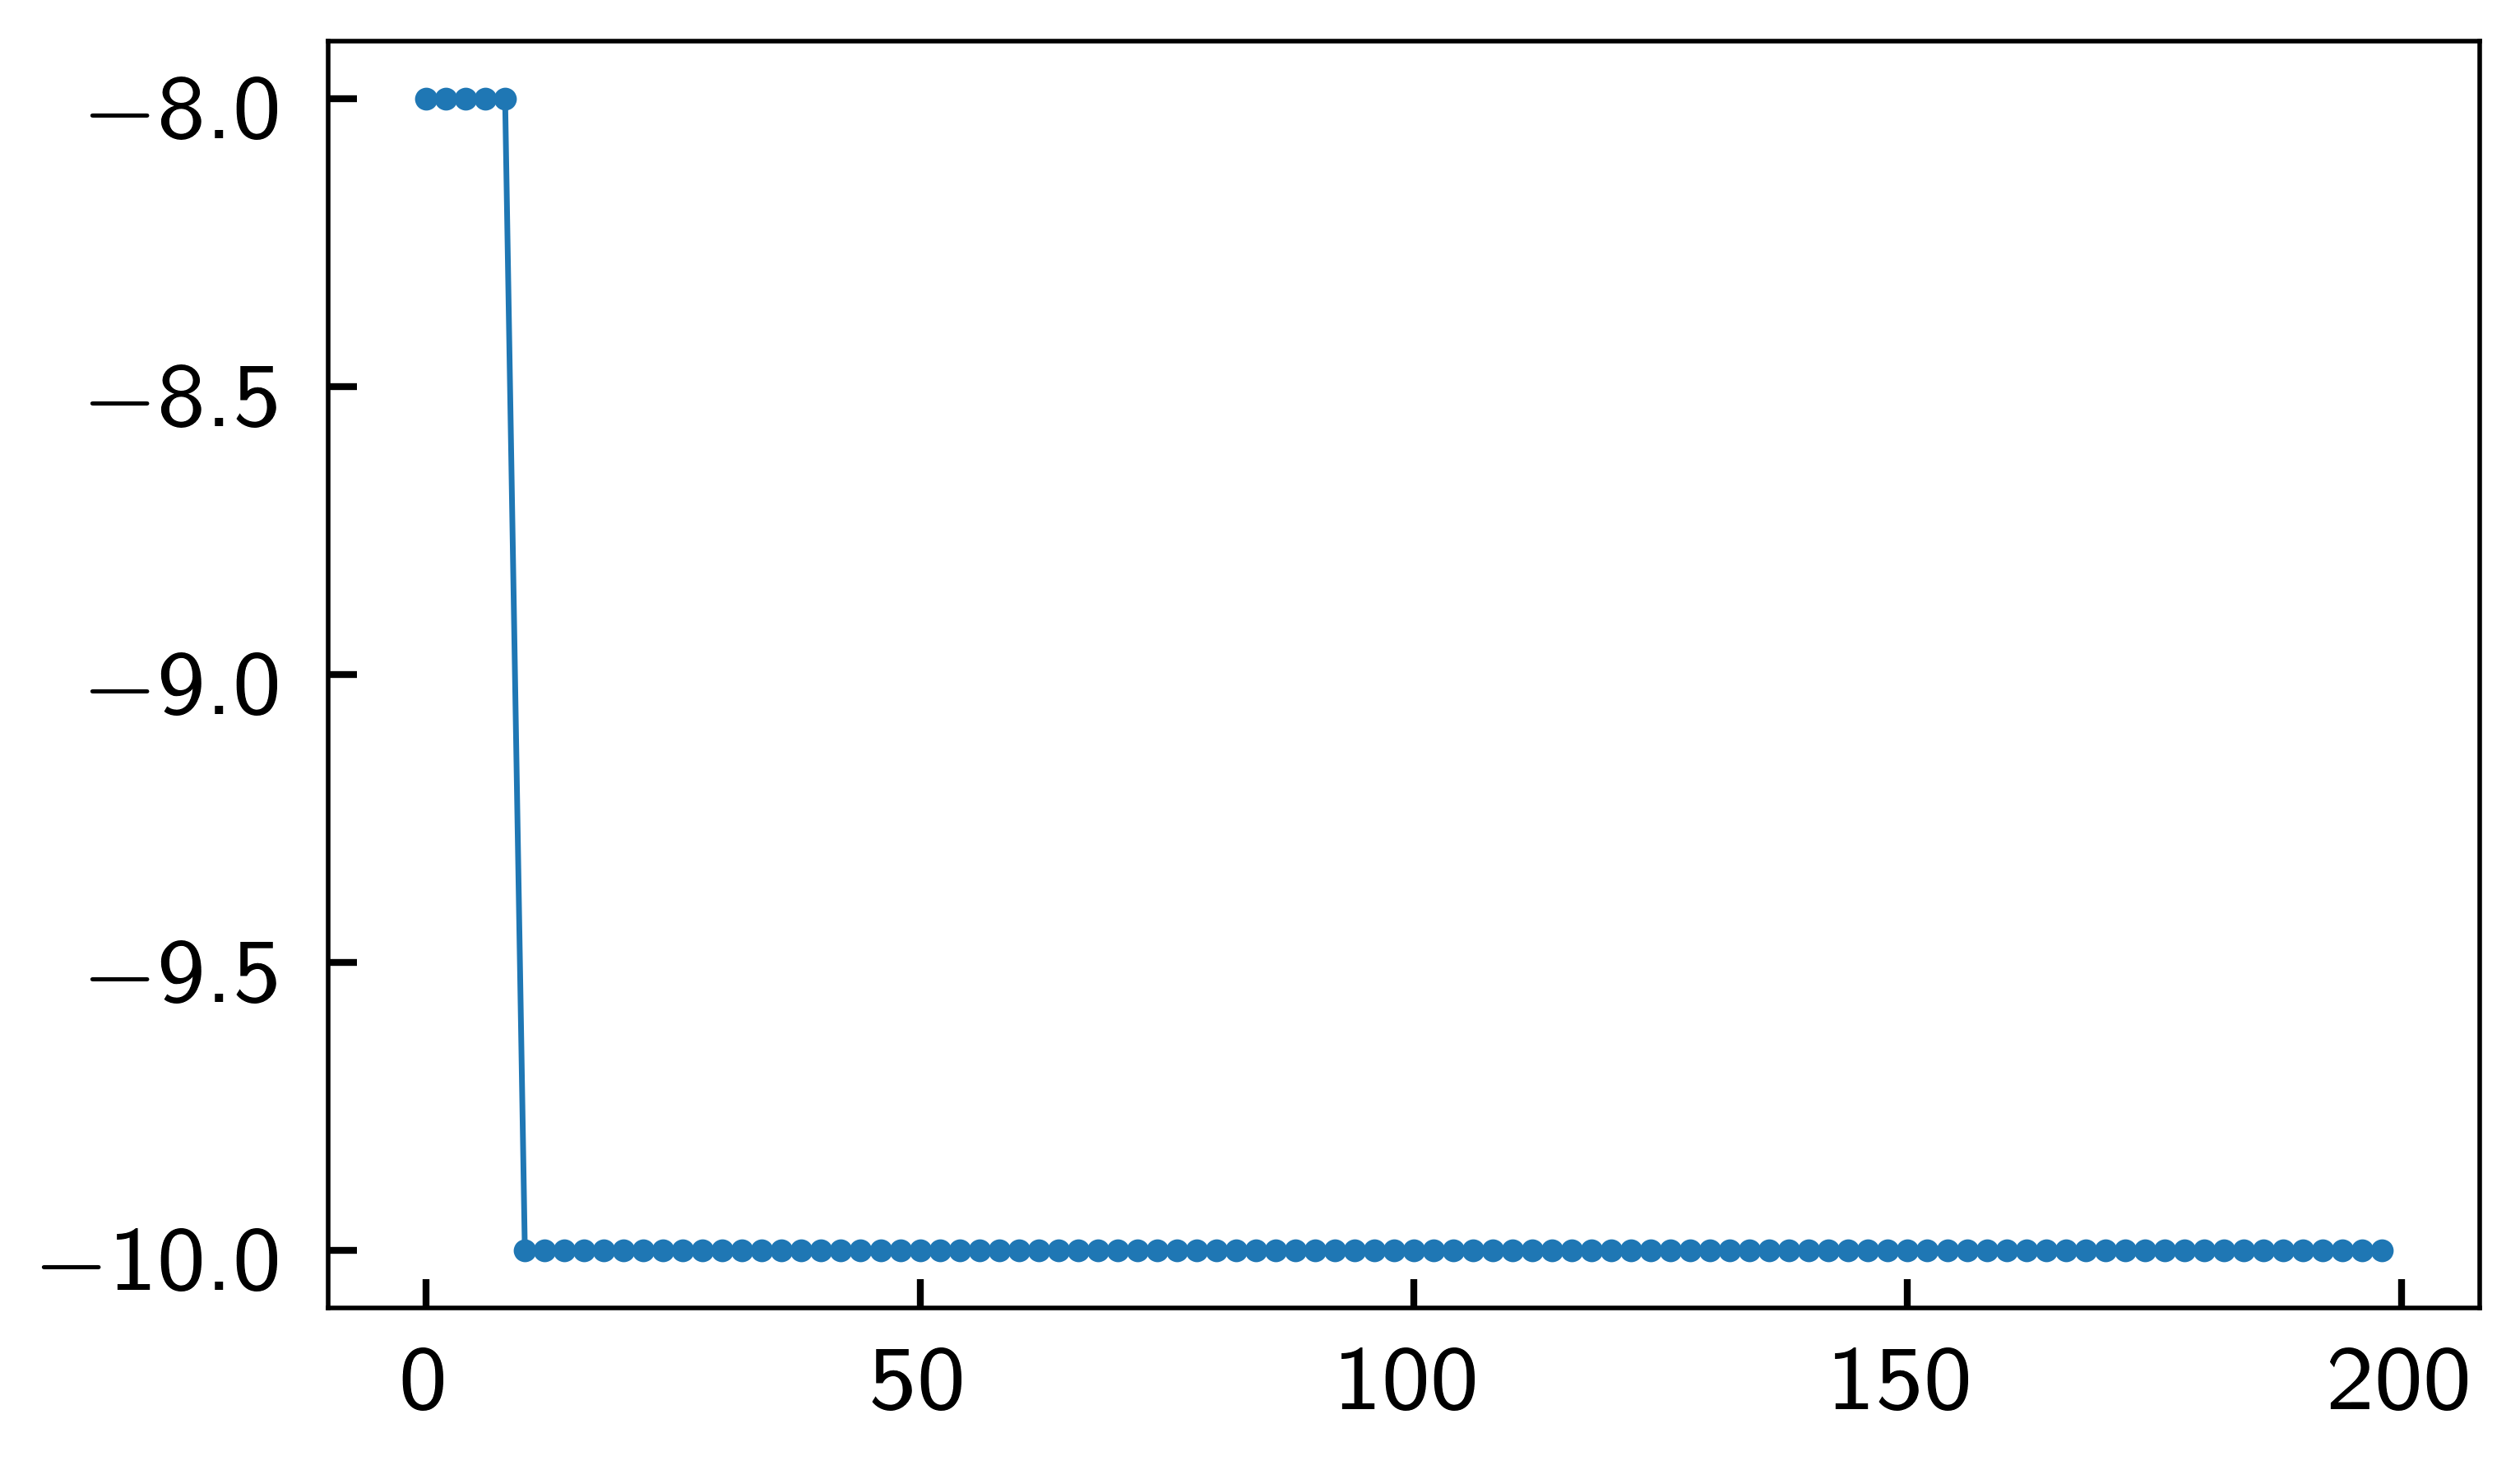

In [4]:
mu = 10
V = np.zeros((Nx)) - mu
V[x<10] +=2
# V[x % 50 < 20] += 2
plt.plot(x, V)

In [5]:
def make_H(k): 
    H_n = np.zeros((Nx, Nx), dtype=complex)

    H_n += np.diag(np.ones(Nx), 0) * (2 * t)
    H_n += np.diag(np.ones(Nx-1), +1) * (- t)
    H_n += np.diag(np.ones(Nx-1), -1) * (- t)
    H_n[0, -1] = -t * np.exp(- 1j * k * L)
    H_n[-1, 0] = -t * np.exp(+ 1j * k * L)

    H_n += np.diag(V)
    
    return H_n

In [6]:
H_test = make_H(2)
assert(not np.any(H_test - H_test.T.conj()))

In [7]:
k_N = 61
k_ax = np.linspace(-np.pi/L, np.pi/L, k_N)

ws = np.zeros((k_N, Nx))
vs = np.zeros((k_N, Nx, Nx), dtype=complex)

In [8]:
for i, k in enumerate(k_ax):
    ws[i], vs[i] = la.eigh(make_H(k))

(-10.0, 5.0)

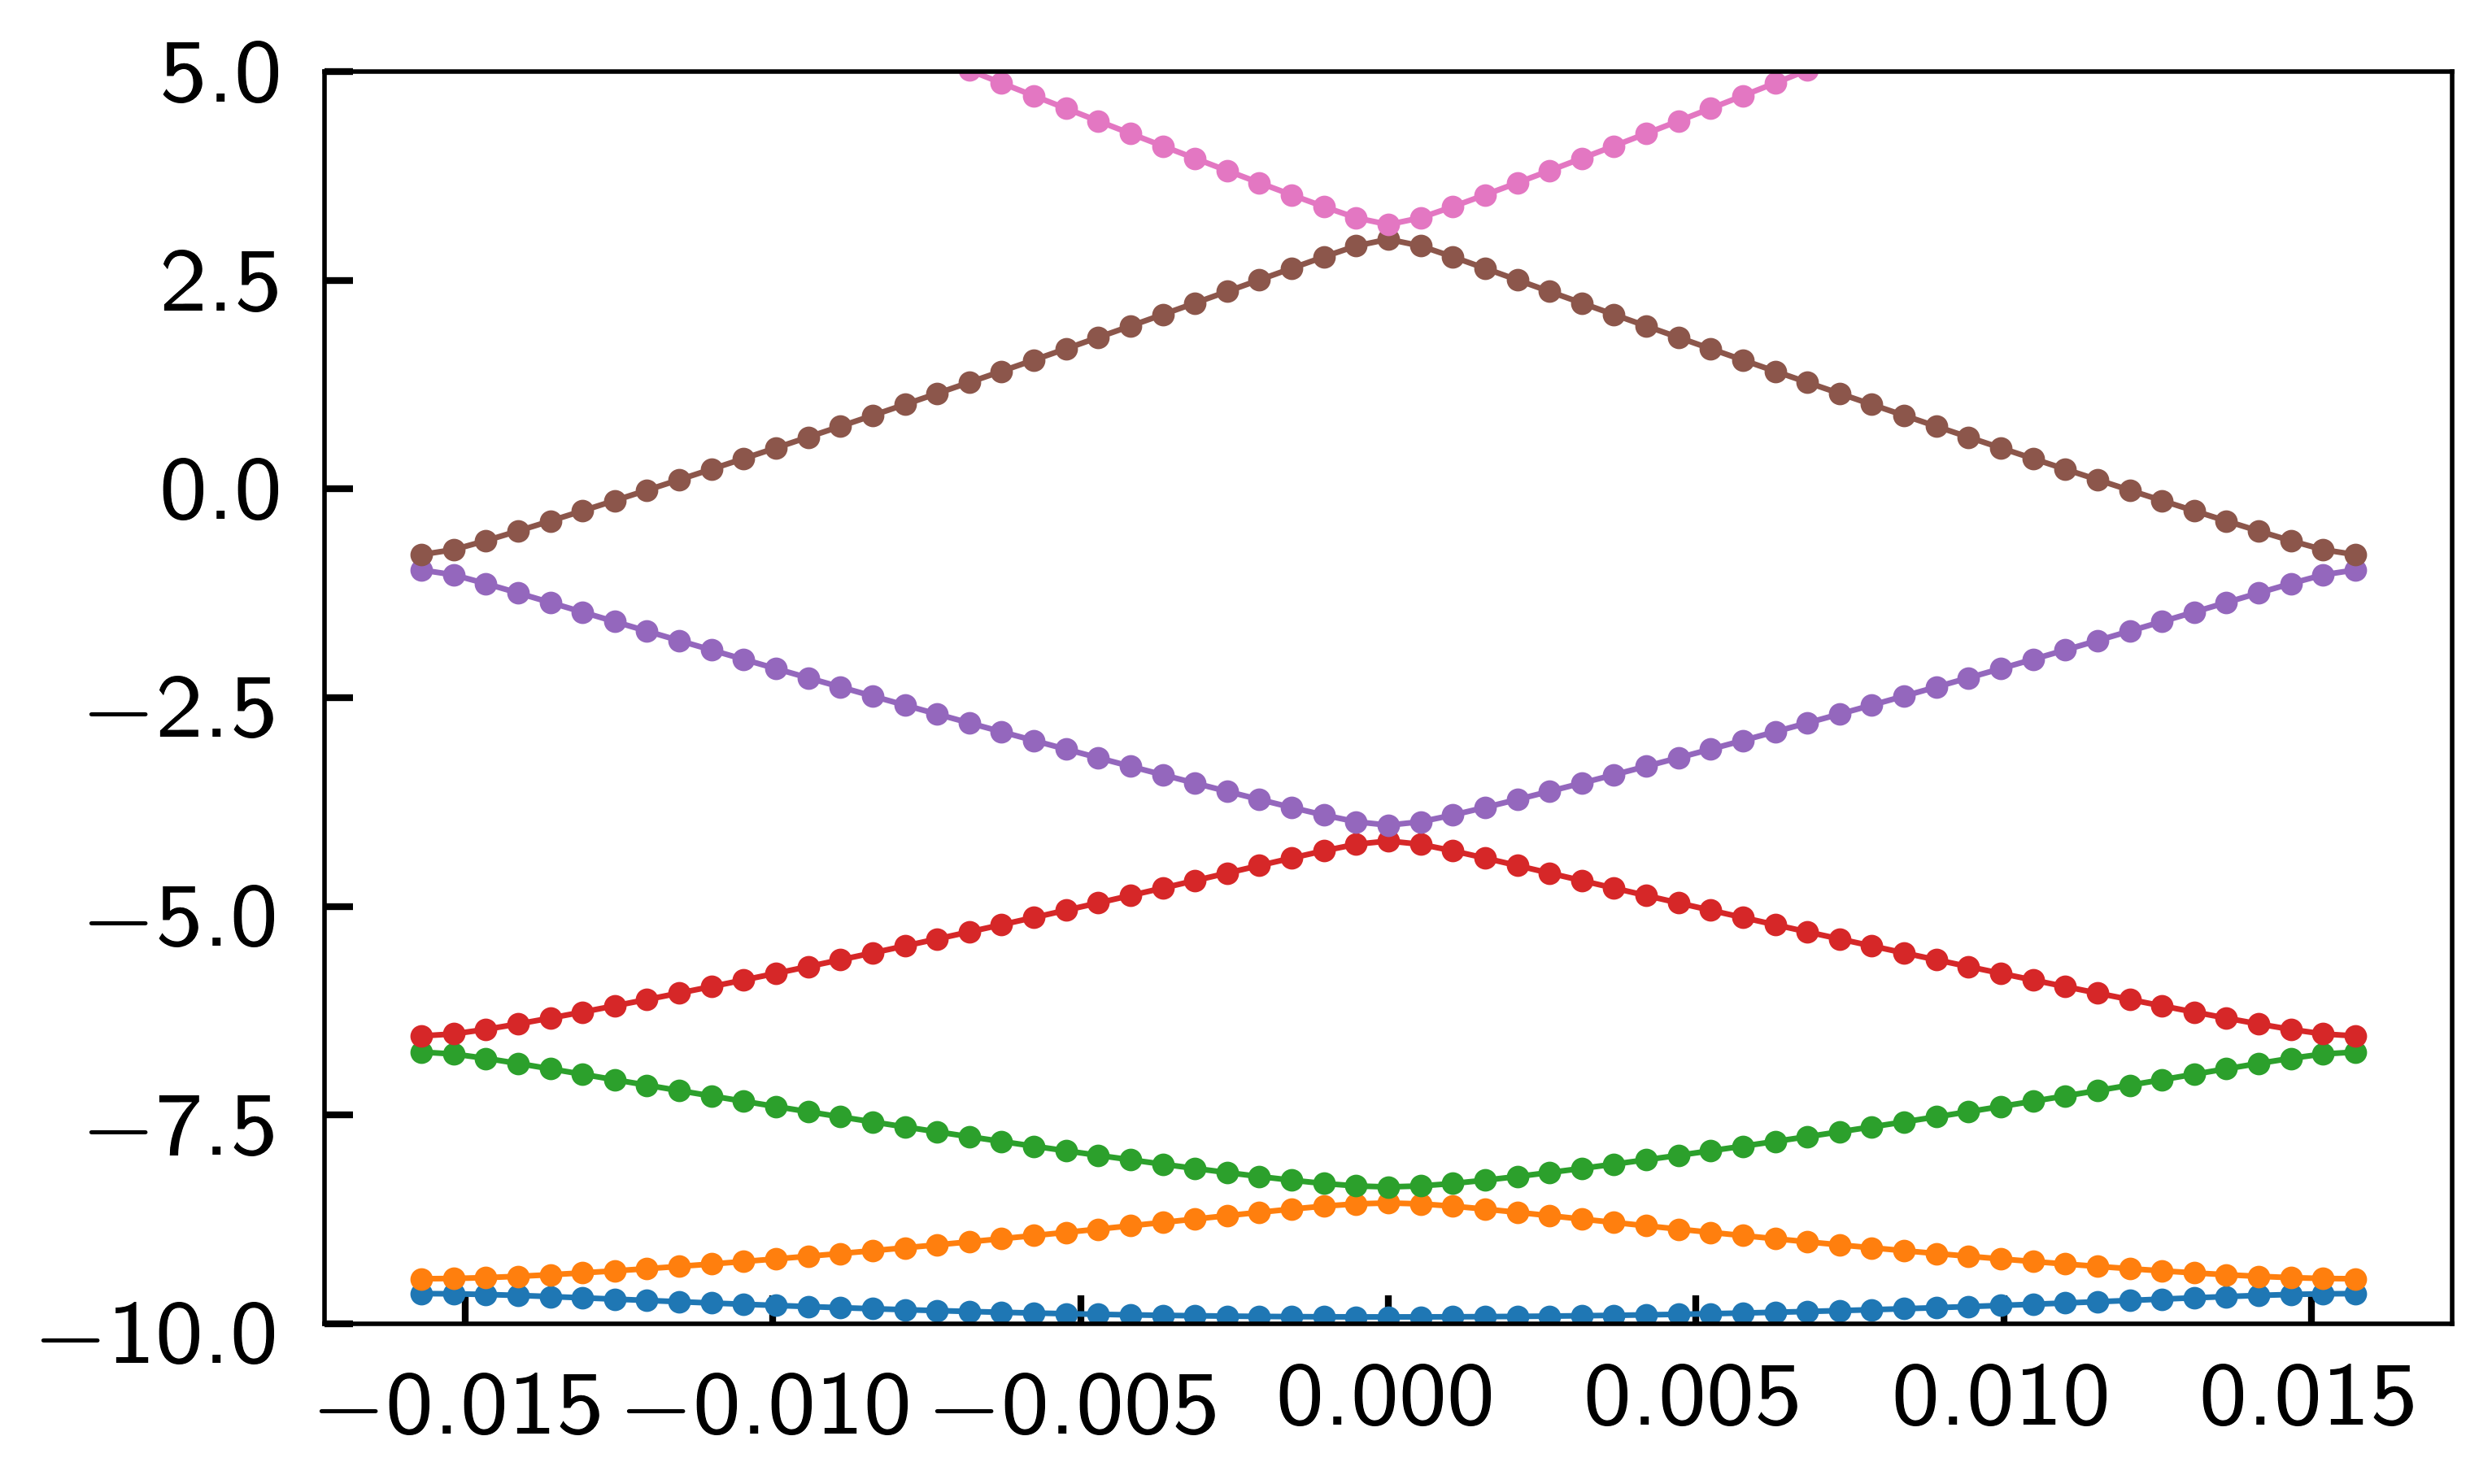

In [9]:
plt.plot(k_ax, ws[:, :]);
plt.ylim(-10, 5)